# MATH 189 Project

Exploring Health-Related Factors Associated with Diabetes in the United States

## Setup

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import sklearn.metrics as metrics

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.stats.outliers_influence import variance_inflation_factor

import lxml

def standardize(X):
    return (X - X.mean()) / X.std()

Data from the CDC Diabetes Health Indicators Dataset, which is available at the UCI Machine Learning Repository. This dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabete, with core features BMI, Smoker, Stroke, age, making it ideal for our analysis. The features are the following:


1. `Diabetes_binary`: 
    * Target variable
    * categorical: 0 = no diabetes 1 = prediabetes or diabetes
2. `HighBP`: 
    * categorical: 0 = no high BP 1 = high BP
4. `HighChol`: 
    * categorical: 0 = no high cholesterol 1 = high cholesterol
5. `CholCheck`: 
    * categorical: 0 = no cholesterol check in 5 years; 1 = yes cholesterol check in 5 years	
6. `BMI`: 
    * discrete quantitative
    * Body Mass Index
7. `Smoker`: 
    * categorical(0 = no 1 = yes)
    * Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
8. `Stroke`:
    * categorical(0 = no 1 = yes)
    * (Ever told) you had a stroke
9. `HeartDiseaseorAttack`:
    * categorical(0 = no 1 = yes)
    * coronary heart disease (CHD) or myocardial infarction (MI)
10. `PhysActivity`: 
    * categorical(0 = no 1 = yes)
    * physical activity in past 30 days - not including job
11. `Fruits`: 
    * categorical(0 = no 1 = yes)
    * Consume Fruit 1 or more times per day
12. `Veggies`: 
    * categorical(0 = no 1 = yes)
    * Consume Vegetables 1 or more times per day
13. `HvyAlcoholConsump`:
    * categorical(0 = no 1 = yes)
    * Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
14. `AnyHealthcare`: 
    * categorical(0 = no 1 = yes)
    * Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.
15. `NoDocbcCost`: 
    * categorical(0 = no 1 = yes)		
    * Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 	
16. `GenHlth`: 
    * ordinal: 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
    * Would you say that in general your health is
17. `MentHlth`:
    * discrete quantitative
    * Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
18. `PhysHlth`: 
    * discrete quantitative 
    * Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
19. `DiffWalk`: 
    * categorical (0 = no 1 = yes)	
    * Do you have serious difficulty walking or climbing stairs? 
20. `Sex`: 
    * categorical(0 = female 1 = male)
21. `Age`: 
    * ordinal: 13-level age category (1 = 18-24, ..., 9 = 60-64, 13 = 80 or older)
22. `Education`: 
    * ordinal: 6-level education category (1 = Never attended school or only kindergarten, 2 = Grades 1 through 8 (Elementary), 3 = Grades 9 through 11 (Some high school), 4 = Grade 12 or GED (High school graduate), 5 = College 1 year to 3 years (Some college or technical school), 6 = College 4 years or more (College graduate))
23. `Income`: 
    * ordinal: 8-level Income scale (1 = less than 10,000, 5 = less than 35,000, 8 = 75,000 or more)

> a. Load the dataset and display the first 5 rows of the dataset.

In [2]:
df = pd.read_csv("diabetes.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [3]:
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [4]:
df.shape

(253680, 22)

> b. convert categorical variables in dataframe

In [5]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [6]:
categorical_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
                    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                    'NoDocbcCost', 'DiffWalk', 'Sex']

for var in categorical_vars:
    df[var] = df[var].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HighBP                253680 non-null  category
 1   HighChol              253680 non-null  category
 2   CholCheck             253680 non-null  category
 3   BMI                   253680 non-null  int64   
 4   Smoker                253680 non-null  category
 5   Stroke                253680 non-null  category
 6   HeartDiseaseorAttack  253680 non-null  category
 7   PhysActivity          253680 non-null  category
 8   Fruits                253680 non-null  category
 9   Veggies               253680 non-null  category
 10  HvyAlcoholConsump     253680 non-null  category
 11  AnyHealthcare         253680 non-null  category
 12  NoDocbcCost           253680 non-null  category
 13  GenHlth               253680 non-null  int64   
 14  MentHlth              253680 non-nul

## EDA

**Univariate Analysis**

In the univariate analysis, we would analyze the distribution of age, BMI, and blood pressure separately.

Firstly, let's check the descriptive statistics of these variables.

In [8]:
df.describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875,0.139333
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148,0.346294
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000,0.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000,1.000000


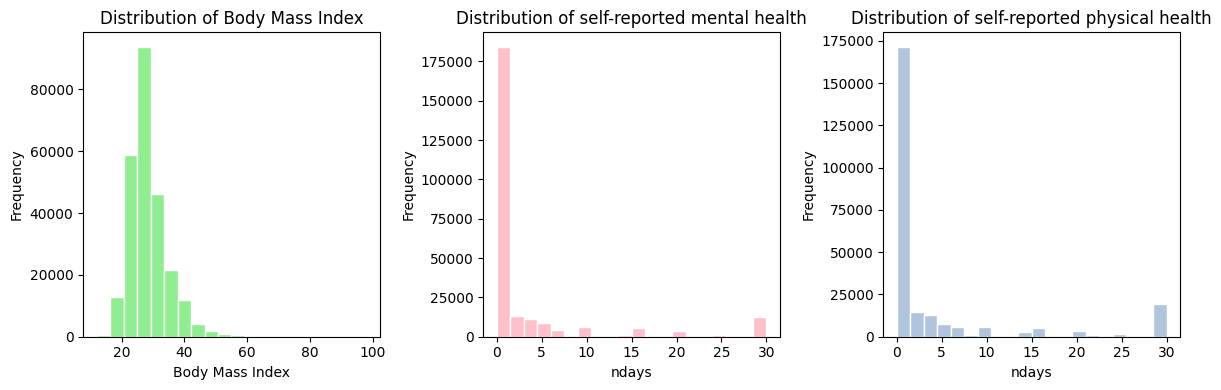

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

df['BMI'].plot(kind='hist', bins=20, ax=axs[0], color='lightgreen', edgecolor='white')
axs[0].set_title('Distribution of Body Mass Index')
axs[0].set_xlabel('Body Mass Index')

df['MentHlth'].plot(kind='hist', bins=20, ax=axs[1], color='pink', edgecolor='white')
axs[1].set_title('Distribution of self-reported mental health')
axs[1].set_xlabel('ndays')

df['PhysHlth'].plot(kind='hist', bins=20, ax=axs[2], color='lightsteelblue', edgecolor='white')
axs[2].set_title('Distribution of self-reported physical health')
axs[2].set_xlabel('ndays')

plt.tight_layout()
plt.show()

**Bivariate Analysis**

## Inferential Analysis: logistic regression model

The relationship is not apparent in scatterplot visualization, it is necessary to assess the results of a logistic regression to determine whether there is a statistically significant relationship between variables and diabetes.

In [10]:
response = 'Diabetes_binary'
covariates = df.columns.drop(response)
formula = f"{response} ~ {' + '.join(covariates)}"
formula

'Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + Veggies + HvyAlcoholConsump + AnyHealthcare + NoDocbcCost + GenHlth + MentHlth + PhysHlth + DiffWalk + Sex + Age + Education + Income'

In [11]:
model = smf.logit(formula, data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.319662
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253658
Method:                           MLE   Df Model:                           21
Date:                Tue, 04 Jun 2024   Pseudo R-squ.:                  0.2083
Time:                        21:43:31   Log-Likelihood:                -81092.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -7.8362      0.094    -83.760      0.000      -8.

> Identify the covariates which are statistically significant at a 5% significance level.

In [12]:
alpha = 0.05
summary_table = model.summary().tables[1].as_html()
summary_df = pd.read_html(summary_table, header=0, index_col=0)[0]
p_values = summary_df['P>|z|']

stats_sig = []

for i in range(len(p_values)):
    if p_values.values[i] < alpha:
        stats_sig.append(p_values.index[i])

stats_sig

['Intercept',
 'HighBP[T.1]',
 'HighChol[T.1]',
 'CholCheck[T.1]',
 'Stroke[T.1]',
 'HeartDiseaseorAttack[T.1]',
 'PhysActivity[T.1]',
 'Fruits[T.1]',
 'Veggies[T.1]',
 'HvyAlcoholConsump[T.1]',
 'AnyHealthcare[T.1]',
 'DiffWalk[T.1]',
 'Sex[T.1]',
 'BMI',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'Age',
 'Education',
 'Income']

> Based on the variables identified above, fit a new logistic regression model only including those covariates.

In [13]:
endog = df['Diabetes_binary']
exog = sm.add_constant(df.drop(columns=['Diabetes_binary', 'Smoker', 'NoDocbcCost']))

model2 = sm.Logit(endog, exog)
result = model2.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.319664
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253660
Method:                           MLE   Df Model:                           19
Date:                Tue, 04 Jun 2024   Pseudo R-squ.:                  0.2083
Time:                        21:43:53   Log-Likelihood:                -81092.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.8317      0.092    -84.974      0.000      -8.012      -7.651

> Add interaction terms in logistic regression model

In [14]:
lr_new_formula = 'Diabetes_binary ~ Age * HighBP + Age * HighChol + Age * BMI + BMI * PhysActivity + CholCheck + Stroke + HvyAlcoholConsump + HeartDiseaseorAttack + Fruits + Veggies + AnyHealthcare + MentHlth + GenHlth * PhysHlth + DiffWalk + Sex + Education + Income'
model3 = smf.logit(lr_new_formula, data=df).fit()
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.317354
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               253680
Model:                          Logit   Df Residuals:                   253655
Method:                           MLE   Df Model:                           24
Date:                Tue, 04 Jun 2024   Pseudo R-squ.:                  0.2140
Time:                        21:44:15   Log-Likelihood:                -80506.
converged:                       True   LL-Null:                   -1.0242e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -7.2647      0.134    -54.050      0.000      -7.

> Interpret each coefficient associated with the covariates in the new logistic regression model, `model3`.

**Main effects**: 
1. Interpretation of `Intercept`: This is the log-odds of having diabetes when all other variables are zero.
2. Interpretation of `HighBP[T.1]`: Having high blood pressure increases the log-odds of diabetes by 1.2826 compared to not having high blood pressure, holding all other variables constant.
3. Interpretation of `HighChol[T.1]`: Having high cholesterol increases the log-odds of diabetes by 1.3716 compared to not having high cholesterol, holding all other variables constant.
4. Interpretation of `PhysActivity[T.1]`: Engaging in physical activity decreases the log-odds of diabetes by 0.2353 compared to not engaging in physical activity, holding all other variables constant.
5. Interpretation of `CholCheck[T.1]`: Having had a cholesterol check in 5 years increases the log-odds of diabetes by 1.2249 compared to not having a cholesterol check, holding all other variables constant.
6. Interpretation of `Stroke[T.1]`: Having had a stroke increases the log-odds of diabetes by 0.1584 compared to not having had a stroke, holding all other variables constant.
7. Interpretation of `HvyAlcoholConsump[T.1]`: Being a heavy alcohol consumer decreases the log-odds of diabetes by 0.7782 compared to not being a heavy alcohol consumer, holding all other variables constant.
8. Interpretation of `HeartDiseaseorAttack[T.1]`: Having had heart disease or a heart attack increases the log-odds of diabetes by 0.2459 compared to not having had heart disease or a heart attack, holding all other variables constant.
9. Interpretation of `Fruits[T.1]`: Consuming fruits daily decreases the log-odds of diabetes by 0.0407 compared to not consuming fruits daily, holding all other variables constant.
10. Interpretation of `Veggies[T.1]`: Consuming vegetables daily decreases the log-odds of diabetes by 0.0307 compared to not consuming vegetables daily, holding all other variables constant.
11. Interpretation of `AnyHealthcare[T.1]`: Having any healthcare coverage increases the log-odds of diabetes by 0.0822 compared to not having healthcare coverage, holding all other variables constant.
12. Interpretation of `DiffWalk[T.1]`: Having difficulty walking increases the log-odds of diabetes by 0.1042 compared to not having difficulty walking, holding all other variables constant.
13. Interpretation of `Sex[T.1]`: Being male increases the log-odds of diabetes by 0.2391 compared to being female, holding all other variables constant.
14. Interpretation of `Age`: Each unit increase in the age category increases the log-odds of diabetes by 0.0441, holding all other variables constant.
15. Interpretation of `BMI` :Each unit increase in BMI increases the log-odds of diabetes by 0.0114, holding all other variables constant.
16. Interpretation of `MentHlth`: Each additional day of poor mental health in the past 30 days decreases the log-odds of diabetes by 0.0030, holding all other variables constant.
17. Interpretation of `GenHlth` :Each unit increase in the general health score (where higher values indicate worse health) increases the log-odds of diabetes by 0.6145, holding all other variables constant.
18. Interpretation of `PhysHlth`: Each additional day of poor physical health in the past 30 days increases the log-odds of diabetes by 0.0399, holding all other variables constant.
19. Interpretation of `Education`: Each unit increase in education level decreases the log-odds of diabetes by 0.0240, holding all other variables constant.
20. Interpretation of `Income`: Each unit increase in income level decreases the log-odds of diabetes by 0.0526, holding all other variables constant.

**Interaction effects**:
1. Interpretation of `Age:HighBP[T.1]`: The effect of age on the log-odds of diabetes is moderated by having high blood pressure. Specifically, each unit increase in age combined with having high blood pressure decreases the log-odds of diabetes by an additional 0.0610.

2. Interpretation of `Age:HighChol[T.1]`: The effect of age on the log-odds of diabetes is moderated by having high cholesterol. Specifically, each unit increase in age combined with having high cholesterol decreases the log-odds of diabetes by an additional 0.0881.

3. Interpretation of `BMI:PhysActivity[T.1]`: The effect of BMI on the log-odds of diabetes is moderated by physical activity. Specifically, each unit increase in BMI combined with engaging in physical activity increases the log-odds of diabetes by an additional 0.0062.

19. Interpretation of `Age:BMI`: The effect of BMI on the log-odds of diabetes is further moderated by age. Specifically, each unit increase in BMI combined with each unit increase in age increases the log-odds of diabetes by an additional 0.0054.

23. Interpretation of `GenHlth:PhysHlth`: The effect of general health on the log-odds of diabetes is moderated by physical health. Specifically, each unit increase in the general health score combined with each additional day of poor physical health decreases the log-odds of diabetes by an additional 0.0124.

### Model Diagnostics

> Fitted values and residuals

The residual plot is randomly scattered around 0

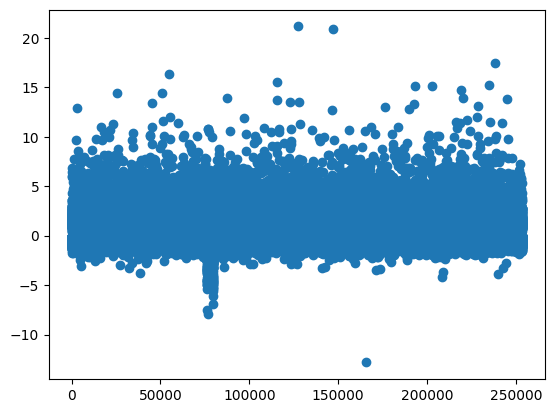

In [15]:
residuals = model3.resid_pearson
plt.scatter(range(len(residuals)), residuals)

> confusion matrix and classification accuracy of `model3`.

The accuracy of 0.8636 indicates that this logistic regression model correctly classifies approximately 86.47% of the instances.

In [16]:
c_matrix = model3.pred_table(threshold=0.5)
c_matrix

array([[213914.,   4420.],
       [ 29899.,   5447.]])

In [17]:
accuracy = (c_matrix[0,0] + c_matrix[1,1]) / c_matrix.sum()
accuracy

0.8647153894670451

> ROC curve and AUC score of `model2`.

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the trade-off between the true positive rate and the false positive rate for every possible cut-off value. An AUC score of 0.8247 suggests that the model is fairly accurate, and it has a good ability to discriminate between thepositive and negative classes. 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


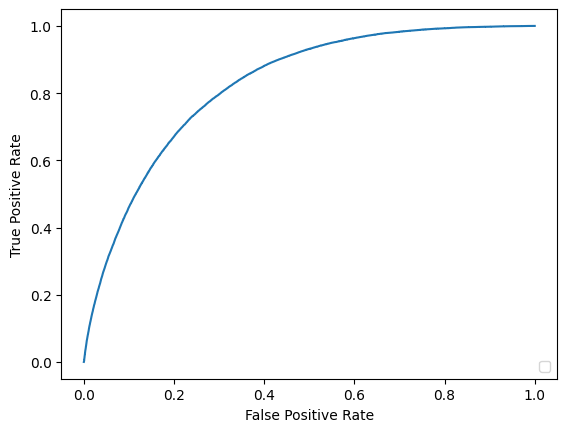

In [18]:
fpr, tpr, thresholds = metrics.roc_curve(df['Diabetes_binary'], model3.predict(df))

indx = (0.1 - 5e-3 <= thresholds) * (thresholds <= 0.1 + 5e-3)
tpr[indx], fpr[indx],  thresholds[indx]

metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [19]:
metrics.roc_auc_score(df['Diabetes_binary'], model3.predict(df))

0.8247132394294344